In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import scipy.stats as stats
import os
from IPython.display import HTML, display
import calendar
from datetime import datetime
import collections
import json

sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Data Loading

In [108]:
#dfs = []
dfs = {}

path = '../US_Datasets/Data'
for file in os.listdir(path):
    #print(file)
    df = pd.read_csv(path + '/' + file)
    date = datetime.strptime(file.split('_')[0], '%y.%d.%m').date()
    dfs[date] = df
    
dfs = collections.OrderedDict(sorted(dfs.items()))
print(dfs.keys())

odict_keys([datetime.date(2019, 12, 11), datetime.date(2019, 12, 12), datetime.date(2019, 12, 13), datetime.date(2019, 12, 14), datetime.date(2019, 12, 15), datetime.date(2019, 12, 17), datetime.date(2019, 12, 18), datetime.date(2019, 12, 19), datetime.date(2019, 12, 20), datetime.date(2019, 12, 21), datetime.date(2019, 12, 22), datetime.date(2019, 12, 23), datetime.date(2019, 12, 24), datetime.date(2019, 12, 25), datetime.date(2019, 12, 27), datetime.date(2019, 12, 29), datetime.date(2020, 1, 2), datetime.date(2020, 1, 3), datetime.date(2020, 1, 4), datetime.date(2020, 1, 5), datetime.date(2020, 1, 6), datetime.date(2020, 1, 7), datetime.date(2020, 1, 8), datetime.date(2020, 1, 9), datetime.date(2020, 1, 10), datetime.date(2020, 1, 11), datetime.date(2020, 1, 12), datetime.date(2020, 1, 13), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16), datetime.date(2020, 1, 17), datetime.date(2020, 1, 18), datetime.date(2020, 1, 19), datetime.date(2020, 1, 20), 

In [109]:
class YTVideo:
    def __init__(self, df_row, days_in_trending=1):
        self.video_id = df_row.video_id
        self.title = df_row.title
        self.published_at = df_row.publishedAt
        self.channel_id = df_row.channelId
        self.channel_title = df_row.channelTitle
        self.category_id = df_row.categoryId
        self.trending_date = df_row.trending_date
        self.tags = df_row.tags
        self.view_count = df_row.view_count
        self.likes = df_row.likes
        self.dislikes = df_row.dislikes
        self.comment_count = df_row.comment_count
        self.thumbnail_link = df_row.thumbnail_link
        self.comments_disabled = df_row.comments_disabled
        self.ratings_disabled = df_row.ratings_disabled
        self.description = df_row.description
        self.days_in_trending = days_in_trending
        
    def __str__(self):
        retval = 'Video ID: {}\nTitle: {}\nPublished at: {}\nChannel ID: {}\nChannel title: {}\nCategory ID: {}\nTrending date: {}\nTags: {}\nView count: {}\nLikes: {}\nDislikes: {}\nComment count: {}\nThumbnail link: {}\nComments disabled: {}\nRatings disabled: {}\nDescription: {}\nDays in trending: {}\n'.format(self.video_id, self.title, self.published_at, self.channel_id, self.channel_title, self.category_id, self.trending_date, self.tags, self.view_count, self.likes, self.dislikes, self.comment_count, self.thumbnail_link, self.comments_disabled, self.ratings_disabled, self.description, self.days_in_trending)
        return retval
    
    def to_dict(self):
        return {
            'video_id': self.video_id,
            'title': self.title,
            'published_at': self.published_at,
            'channel_id': self.channel_id,
            'channel_title': self.channel_title,
            'category_id': self.category_id,
            'trending_date': self.trending_date,
            'tags': self.tags,
            'view_count': self.view_count,
            'likes': self.likes,
            'dislikes': self.dislikes,
            'comment_count': self.comment_count,
            'thumbnail_link': self.thumbnail_link,
            'comments_disabled': self.comments_disabled,
            'ratings_disabled': self.ratings_disabled,
            'description': self.description,
            'days_in_trending': self.days_in_trending
        }

In [110]:
first_day = list(dfs.values())[0].iloc[0].trending_date
last_day = list(dfs.values())[-1].iloc[0].trending_date
print('First day: {}'.format(first_day))
print('Last day: {}'.format(last_day))

videos = dict()

# u obzir dolaze videi koji su usli i izasli iz trendinga za vreme skupljanja podataka
for df in dfs.values():
    for index, row in df.iterrows():
        if row.video_id in videos:
            videos[row.video_id].days_in_trending += 1
        else:
            # provera da li video iz naseg prvog dana
            if row.trending_date != first_day and row.trending_date != last_day:
                videos[row.video_id] = YTVideo(row)

First day: 19.11.12
Last day: 20.13.02


In [6]:
for video in videos.values():
    print(video)
    print('---------------------------------------------------------------------------------------------------')

Video ID: vPx6M7eTYbc
Title: Spill Your Guts: Harry Styles & Kendall Jenner
Published at: 2019-12-11T07:08:34.000Z
Channel ID: UCJ0uqCI0Vqr2Rrt1HseGirg
Channel title: The Late Late Show with James Corden
Category ID: 24
Trending date: 19.12.12
Tags: The Late Late Show|Late Late Show|James Corden|Corden|late night|late night show|comedy|comedian|celebrity|celeb|celebrities|CBS|joke|jokes|funny|funny videos|funny video|humor|hollywood|famous|spill your guts|harry kendall|harry styles kendall jenner|kendall jenner|kendall|harry styles|gross food|harry styles questions|kendall jenner questions|harry styles hosts late late show
View count: 11636632
Likes: 571835
Dislikes: 8256
Comment count: 20068
Thumbnail link: https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg
Comments disabled: False
Ratings disabled: False
Description: Late Late Show guest host Harry Styles challenges Kendall Jenner to a game of Spill Your Guts or Fill Your Guts, in which the two ask each other very personal questions and 


---------------------------------------------------------------------------------------------------
Video ID: 9puQp_MhFpo
Title: ASMR CHEESY CHICKEN NUGGETS, HASH BROWNS & FRIES MUKBANG (No Talking) EATING SOUNDS | Zach Choi ASMR
Published at: 2019-12-29T04:52:41.000Z
Channel ID: UCI78AdiI6f7VKhqW1i4B3Rw
Channel title: Zach Choi ASMR
Category ID: 22
Trending date: 19.29.12
Tags: asmr| zach choi|zachchoi|zach choi asmr|mukbang|먹방| 쇼| 이팅| 사운드| korean asmr|asmr eating|asmr eating no talking|asmr mukbang|asmr mukbang no talking|asmr mcdonalds chicken nuggets|asmr mcdonalds no talking|asmr mcdonalds mukbang|asmr hash browns|asmr hash browns with cheese|asmr hash browns and chicken|asmr eating hash browns with cheese|asmr fries with cheese|asmr fries no talking|asmr fries mukbang|asmr hash browns and chicken nuggets|yt:cc=on
View count: 504941
Likes: 28713
Dislikes: 1170
Comment count: 3128
Thumbnail link: https://i.ytimg.com/vi/9puQp_MhFpo/default.jpg
Comments disabled: False
Ratings disab

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [111]:
print('Broj videa: {}'.format(len(videos)))

Broj videa: 2272


In [112]:
# kreiranje dataframe-a
videos_df = pd.DataFrame([video.to_dict() for video in videos.values()])

In [113]:
videos_df

category_id                channel_id  \
0              24  UCJ0uqCI0Vqr2Rrt1HseGirg   
1              26  UCDSJCBYqL7VQrlXfhr1RtwA   
2              17  UCQIUhhcmXsu6cN6n3y9-Pww   
3              17  UCWJ2lWNubArHWmf3FIHbfcQ   
4              24  UCtj45MepAoKxZoyR_Mnt86Q   
5              24  UCilwZiBBfI9X6yiZRzWty8Q   
6              24  UCG8rbF3g2AMX70yOd8vqIZg   
7              23  UCpi8TJfiA4lKGkaXs__YdBA   
8              23  UC4G10tk3AHFuyMIuD3rHOBA   
9              24  UCaj53l_4tT1m5DfsxLtcxpQ   
10             24  UCpB959t8iPrxQWj7G6n0ctQ   
11             25  UCXIJgqnII2ZOINSWNOGFThA   
12             24  UCJjSDX-jUChzOEyok9XYRJQ   
13             20  UCw1SQ6QRRtfAhrN_cjkrOgA   
14             24  UCp0hYYBW6IMayGgR-WeoCvQ   
15             22  UCYL9lSER7W0kMXbGCprMS0A   
16             23  UCkS8bfIrm38QCSQeOqRxR4A   
17             24  UChi08h4577eFsNXGd3sxYhw   
18             24  UCVTQuK2CaWaTgSsoNkn5AiQ   
19             22  UC5LGPvoUOfwcLi4Ck8LiR4A   
20             24  UCzpCc5n9hqiVC7HhPwcIKEg   
21             17  UCvgfXK4nTYKudb0rFR6noLA   
22             24  UCMtFAi84ehTSYSE9XoHefig   
23             24  UCa90xqK2odw1KV5wHU9WRhg   
24             24  UC4PooiX37Pld1T8J5SYT-SQ   
25             24  UCK7IIV6Q2junGSdYK3BmZMg   
26             23  UC5jkXpfnBhlDjqh0ir5FsIQ   
27             22  UC-rN2gfG9OhqitnrRPnPmHg   
28             24  UCz97F7dMxBNOfGYu3rx8aCw   
29             24  UCgFvT6pUq9HLOvKBYERzXSQ   
...           ...                       ...   
2242           24  UCXGR70CkW_pXb8n52LzCCRw   
2243           24  UCZDdF_p-L88NWVpzF0vjvMQ   
2244           24  UCJHA_jMfCvEnv-3kRjTCQXw   
2245           25  UCuFFtHWoLl5fauMMD5Ww2jA   
2246           17  UCJ5v_MCY6GNUBTO8-D3XoAg   
2247           28  UCj34AOIMl_k1fF7hcBkD_dw   
2248           28  UCXuqSBlHAE6Xw-yeJA0Tunw   
2249           26  UC6jgzx2g3nlbaYkd8EMweKA   
2250           24  UCWOA1ZGywLbqmigxE4Qlvuw   
2251           17  UCiWLfSweyRNmLpgEHekhoAg   
2252           27  UC1zZE_kJ8rQHgLTVfobLi_g   
2253           24  UCyoEZ7icpGsUlki08Is8v9g   
2254           24  UC4PooiX37Pld1T8J5SYT-SQ   
2255           24  UClQubH2NeMmGLTLgNdLBwXg   
2256           27  UC7_gcs09iThXybpVgjHZ_7g   
2257           23  UCa6vGFO9ty8v5KZJXQxdhaw   
2258           25  UC16niRr50-MSBwiO3YDb3RA   
2259           24  UChnGFN2LRHBq-0PM6dOaq5A   
2260           20  UCsgv2QHkT2ljEixyulzOnUQ   
2261           22  UCj0lRqUVkLgTpHZxzyionQw   
2262           24  UCY6Ij8zOds0WJEeqCLOnqOQ   
2263           24  UCXVxMuWK6l_pCyxEk07EIRw   
2264           24  UCv7YFWATebnJ1ty4cwMKgsQ   
2265           25  UCP6HGa63sBC7-KHtkme-p-g   
2266           23  UCXq2nALoSbxLMehAvYTxt_A   
2267           24  UCokpOoe2OrddBfl6I_oY5vQ   
2268           22  UCBNnILlexKYtJu-EGUvq_iA   
2269           24  UCHEf6T_gVq4tlW5i91ESiWg   
2270            2  UCgJRL30YS6XFxq9Ga8W2J3A   
2271           17  UCLXzq85ijg2LwJWFrz4pkmw   

                             channel_title  comment_count  comments_disabled  \
0     The Late Late Show with James Corden          20068              False   
1                            Les Do Makeup          13130              False   
2                                   Jesser            931              False   
3                                      NBA            668              False   
4                             Royal Family           1907              False   
5                                 FaZe Rug           4510              False   
6                               Logan Paul          22355              False   
7                             The Try Guys           4686              False   
8                                RDCworld1           3439              False   
9                       VH1 Love & Hip Hop           2726              False   
10                            SSSniperWolf           2717              False   
11                                Fox News            889              False   
12                                 Jubilee         

In [114]:
# add category_name label to dataframe
category_df = pd.read_csv('../GB_Datasets/Categories.csv')

def map_category_id_to_name(category_id):
    return category_df[category_df['category_id'] == category_id]['category_name'].values[0]

videos_df['category_name'] = videos_df['category_id'].apply(lambda var: map_category_id_to_name(var))

In [115]:
videos_df.head()

category_id                channel_id  \
0           24  UCJ0uqCI0Vqr2Rrt1HseGirg   
1           26  UCDSJCBYqL7VQrlXfhr1RtwA   
2           17  UCQIUhhcmXsu6cN6n3y9-Pww   
3           17  UCWJ2lWNubArHWmf3FIHbfcQ   
4           24  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  comment_count  comments_disabled  \
0  The Late Late Show with James Corden          20068              False   
1                         Les Do Makeup          13130              False   
2                                Jesser            931              False   
3                                   NBA            668              False   
4                          Royal Family           1907              False   

   days_in_trending                                        description  \
0                 1  Late Late Show guest host Harry Styles challen...   
1                 7  Hi babygirls!  Thank you so much for watching ...   
2                 7  Last to miss the basketball shot wins 10,000!●...   
3                 2  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4                 6  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...   

   dislikes   likes              published_at  ratings_disabled  \
0      8256  571835  2019-12-11T07:08:34.000Z             False   
1       773   52780  2019-12-12T05:25:42.000Z             False   
2       586   20178  2019-12-11T23:00:53.000Z             False   
3       288    4605  2019-12-12T02:35:33.000Z             False   
4       164   18400  2019-12-12T02:38:37.000Z             False   

                                                tags  \
0  The Late Late Show|Late Late Show|James Corden...   
1                                             [none]   
2  last to leave|nba basketball|nba basketball hi...   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...   

                                   thumbnail_link  \
0  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

                                               title trending_date  \
0     Spill Your Guts: Harry Styles & Kendall Jenner      19.12.12   
1                           WE GOT UNEXPECTED NEWS..      19.12.12   
2                    Last To Miss Layup Wins $10,000      19.12.12   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...      19.12.12   
4  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...      19.12.12   

      video_id  view_count   category_name  
0  vPx6M7eTYbc    11636632   Entertainment  
1  sg8WaeeFyNY      423215  How-to & Style  
2  q1PR05q8l2g      463685           Sport  
3  t6Z6RIXq0L0      659579           Sport  
4  TGDpRB4ovvA      175558   Entertainment

# Exploratory Data Analysis

### Top 15 most popular categories by number of videos in trending

[Text(0, 0.5, 'Number of videos in trending'), Text(0.5, 0, 'Category')]

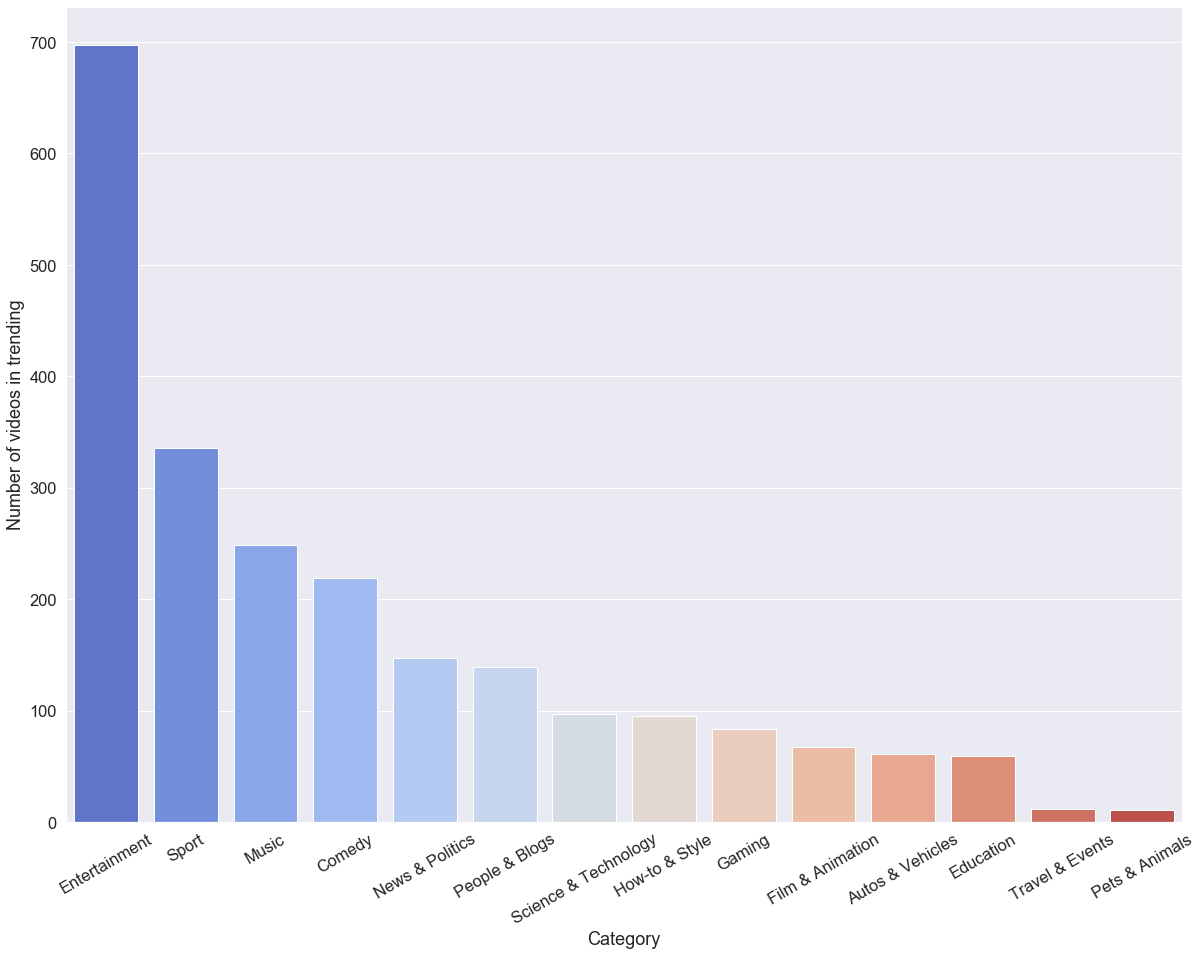

In [25]:
# Most popular categories by number of videos in trending
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='category_name', data=videos_df, order=videos_df['category_name'].value_counts().index, palette='coolwarm', ax=ax)
plt.xticks(rotation=30)
ax.set(xlabel='Category', ylabel='Number of videos in trending')

### Top 15 most popular channels by number of videos in trending

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Number of videos in trending')]

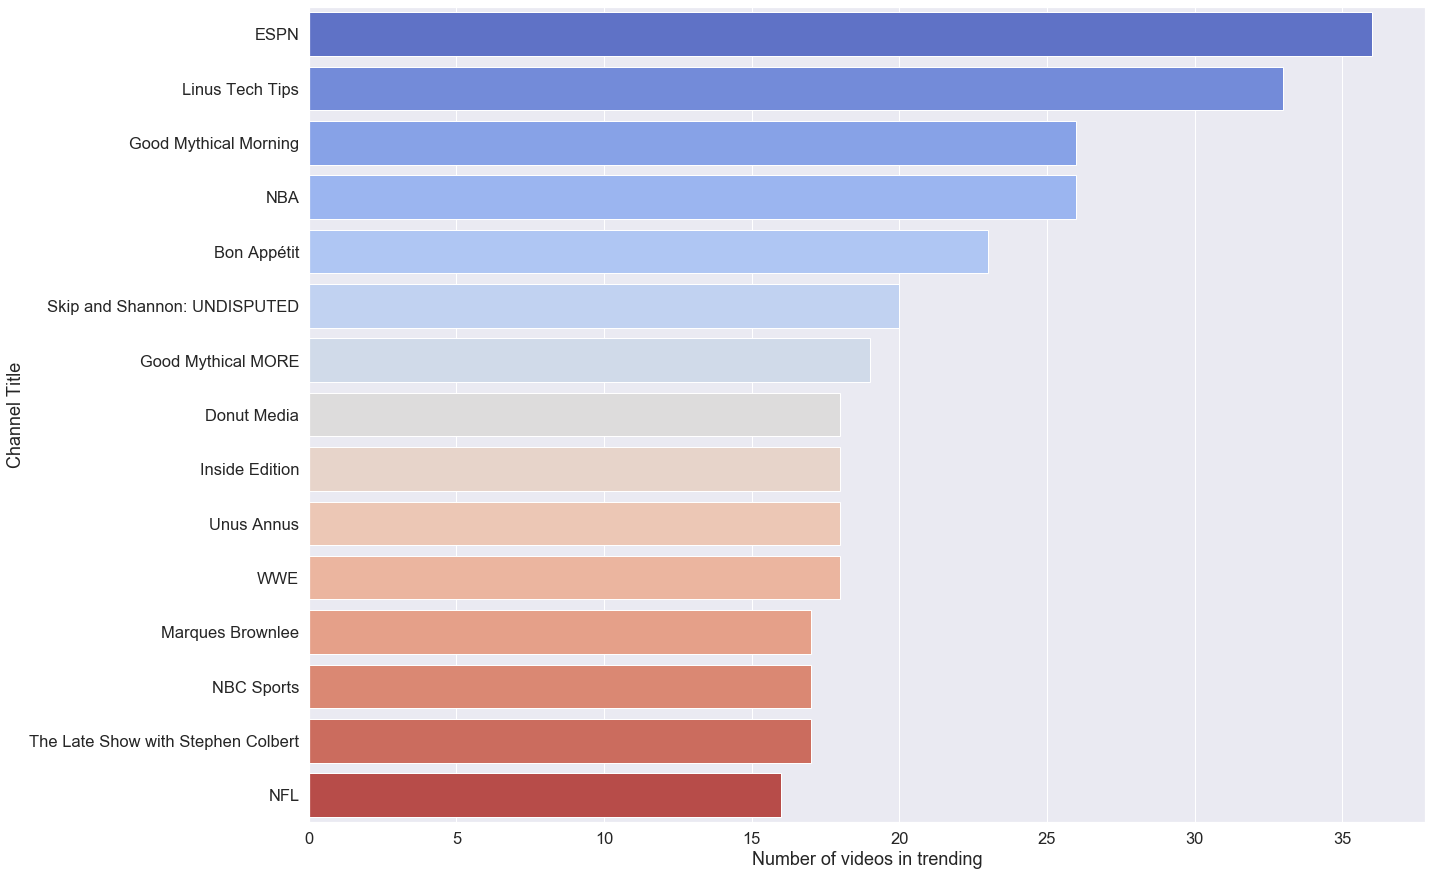

In [26]:
# Most popular channels by number of videos in trending
channel_trending_videos = videos_df.groupby('channel_title')[['video_id', 'channel_title']].count()
top_channels = channel_trending_videos.nlargest(15, 'video_id')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_channels['channel_title'], y=top_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Number of videos in trending', ylabel='Channel Title')

### Top 15 most popular channels by number of views

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Total number of views')]

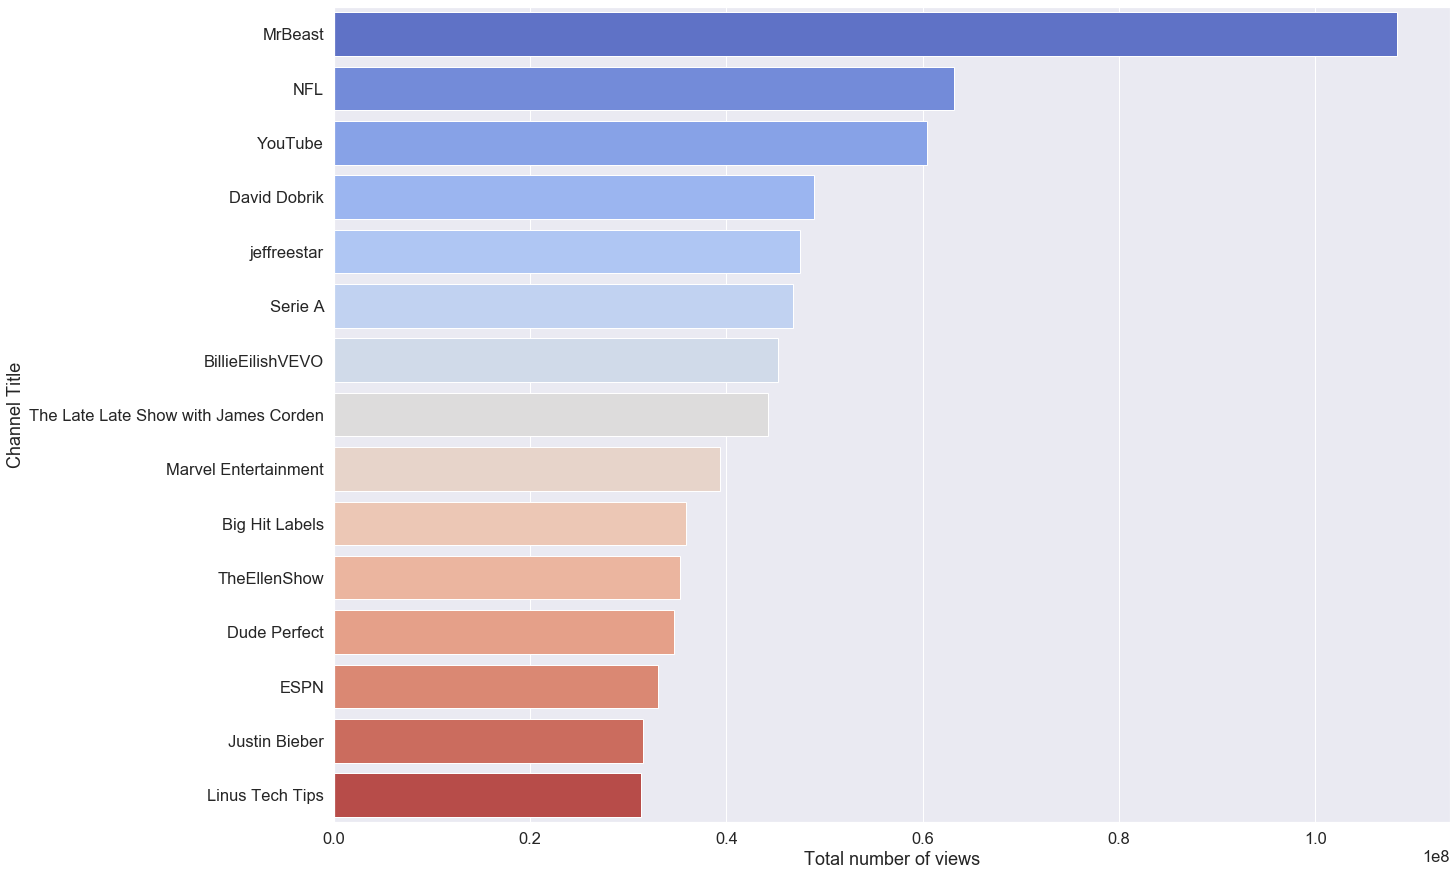

In [27]:
top_views_channels = videos_df.groupby('channel_title')[['view_count', 'channel_title']].sum()
top_viwes_channels = top_views_channels.nlargest(15, 'view_count')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_viwes_channels['view_count'], y=top_viwes_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Total number of views', ylabel='Channel Title')

### Top 15 most popular channels by number of likes

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Total number of likes')]

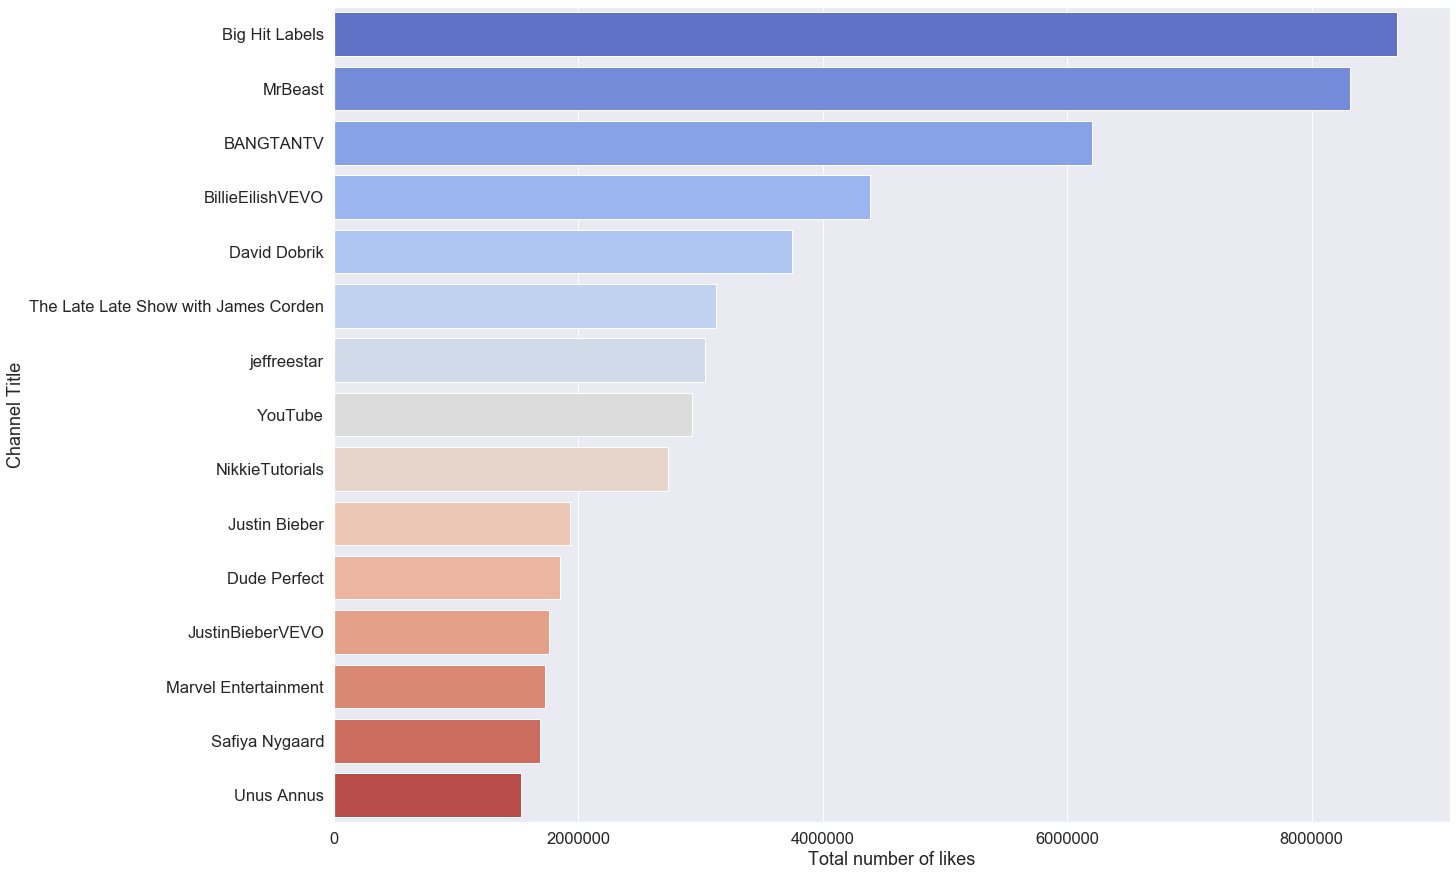

In [28]:
top_likes_channels = videos_df.groupby('channel_title')[['likes', 'channel_title']].sum()
top_likes_channels = top_likes_channels.nlargest(15, 'likes')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_likes_channels['likes'], y=top_likes_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Total number of likes', ylabel='Channel Title')

### Processing the dates

In [29]:
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%y.%d.%m')
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos_df.head()

# get date or time from datetime
#videos_df['published_at'].dt.time
#videos_df['published_at'].dt.date

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

         published_at                channel_id  \
0 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
1 2019-12-12 05:25:42  UCDSJCBYqL7VQrlXfhr1RtwA   
2 2019-12-11 23:00:53  UCQIUhhcmXsu6cN6n3y9-Pww   
3 2019-12-12 02:35:33  UCWJ2lWNubArHWmf3FIHbfcQ   
4 2019-12-12 02:38:37  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24    2019-12-12   
1                         Les Do Makeup           26    2019-12-12   
2                                Jesser           17    2019-12-12   
3                                   NBA           17    2019-12-12   
4                          Royal Family           24    2019-12-12   

                                                tags  view_count   likes  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835   
1                                             [none]      423215   52780   
2  last to leave|nba basketball|nba basketball hi...      463685   20178   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400   

   dislikes  comment_count                                  thumbnail_link  \
0      8256          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1       773          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2       586            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3       288            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4       164           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                 1   
1  Hi babygirls!  Thank you so much for watching ...                 7   
2  Last to miss the basketball shot wins 10,000!●...                 7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                 2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                 6   

    category_name  
0   Entertainment  
1  How-to & Style  
2           Sport  
3           Sport  
4   Entertainment

### Adding new column for number of days from video posting to trending

In [30]:
publish_to_trend = videos_df['trending_date'].dt.date - videos_df['published_at'].dt.date
videos_df['publish_to_trend'] = publish_to_trend.dt.days
videos_df.head()

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

         published_at                channel_id  \
0 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
1 2019-12-12 05:25:42  UCDSJCBYqL7VQrlXfhr1RtwA   
2 2019-12-11 23:00:53  UCQIUhhcmXsu6cN6n3y9-Pww   
3 2019-12-12 02:35:33  UCWJ2lWNubArHWmf3FIHbfcQ   
4 2019-12-12 02:38:37  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24    2019-12-12   
1                         Les Do Makeup           26    2019-12-12   
2                                Jesser           17    2019-12-12   
3                                   NBA           17    2019-12-12   
4                          Royal Family           24    2019-12-12   

                                                tags  view_count   likes  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835   
1                                             [none]      423215   52780   
2  last to leave|nba basketball|nba basketball hi...      463685   20178   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400   

   dislikes  comment_count                                  thumbnail_link  \
0      8256          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1       773          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2       586            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3       288            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4       164           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                 1   
1  Hi babygirls!  Thank you so much for watching ...                 7   
2  Last to miss the basketball shot wins 10,000!●...                 7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                 2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                 6   

    category_name  publish_to_trend  
0   Entertainment                 1  
1  How-to & Style                 0  
2           Sport                 1  
3           Sport                 0  
4   Entertainment                 0

### Top 15 videos that were the longest in trending

[Text(0, 0.5, 'Video Title'), Text(0.5, 0, 'Days in trending')]

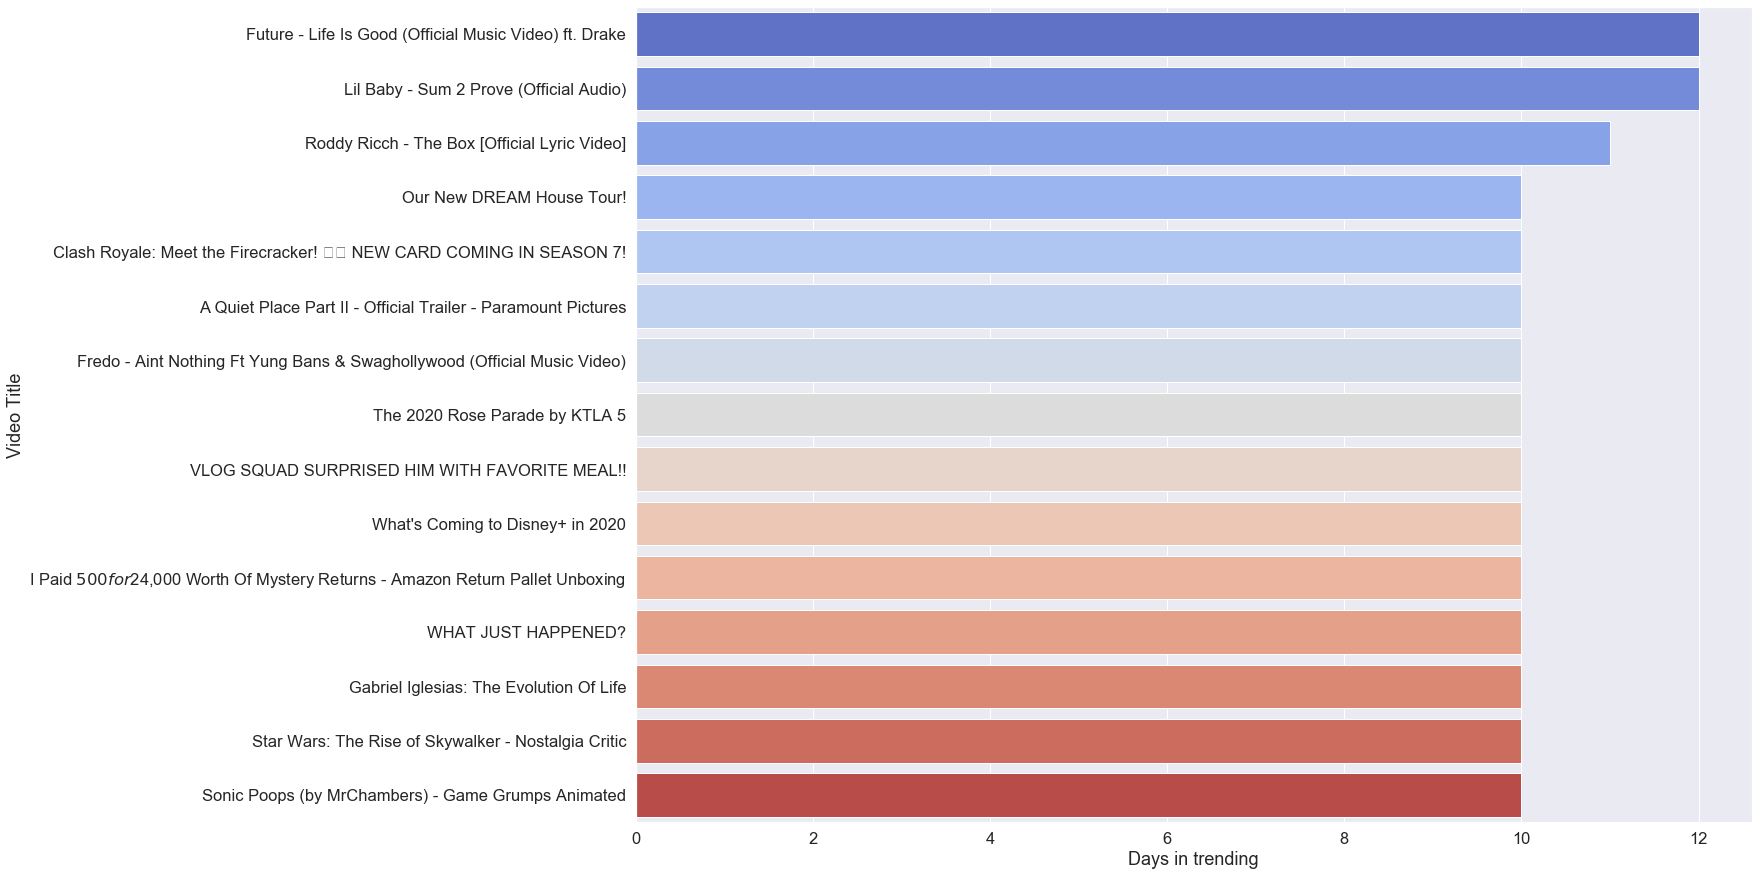

In [32]:
# top 15 videos that were the longest in trending
top_videos = videos_df.nlargest(15, 'days_in_trending')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_videos['days_in_trending'], y=top_videos['title'], palette='coolwarm', ax=ax)
ax.set(xlabel='Days in trending', ylabel='Video Title')

[Text(0.5, 0, 'Days in trending')]

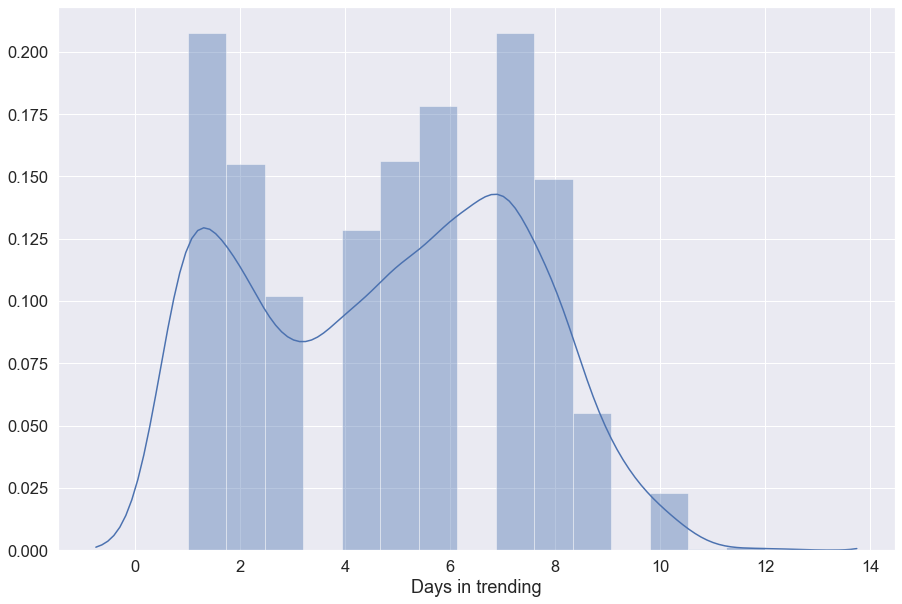

In [33]:
# distribution of days in trending
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(videos_df['days_in_trending'])
ax.set(xlabel='Days in trending')

### Likes/Dislikes ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Likes/Dislikes Ratio')]

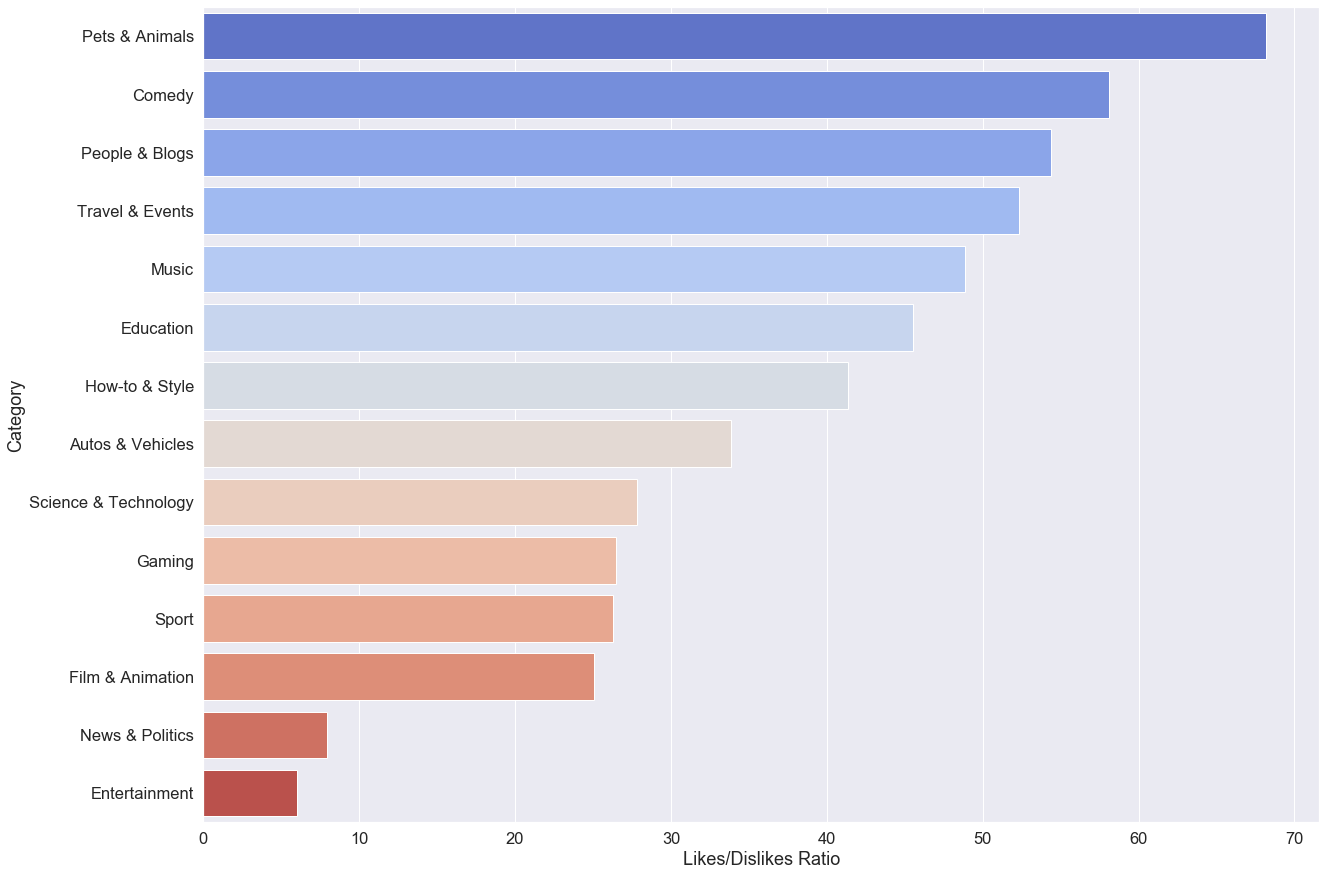

In [34]:
like_dislike_ratio = videos_df.groupby('category_name')['likes'].sum() / videos_df.groupby('category_name')['dislikes'].sum()
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=like_dislike_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Likes/Dislikes Ratio', ylabel='Category')

### Comments/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Comments Ratio')]

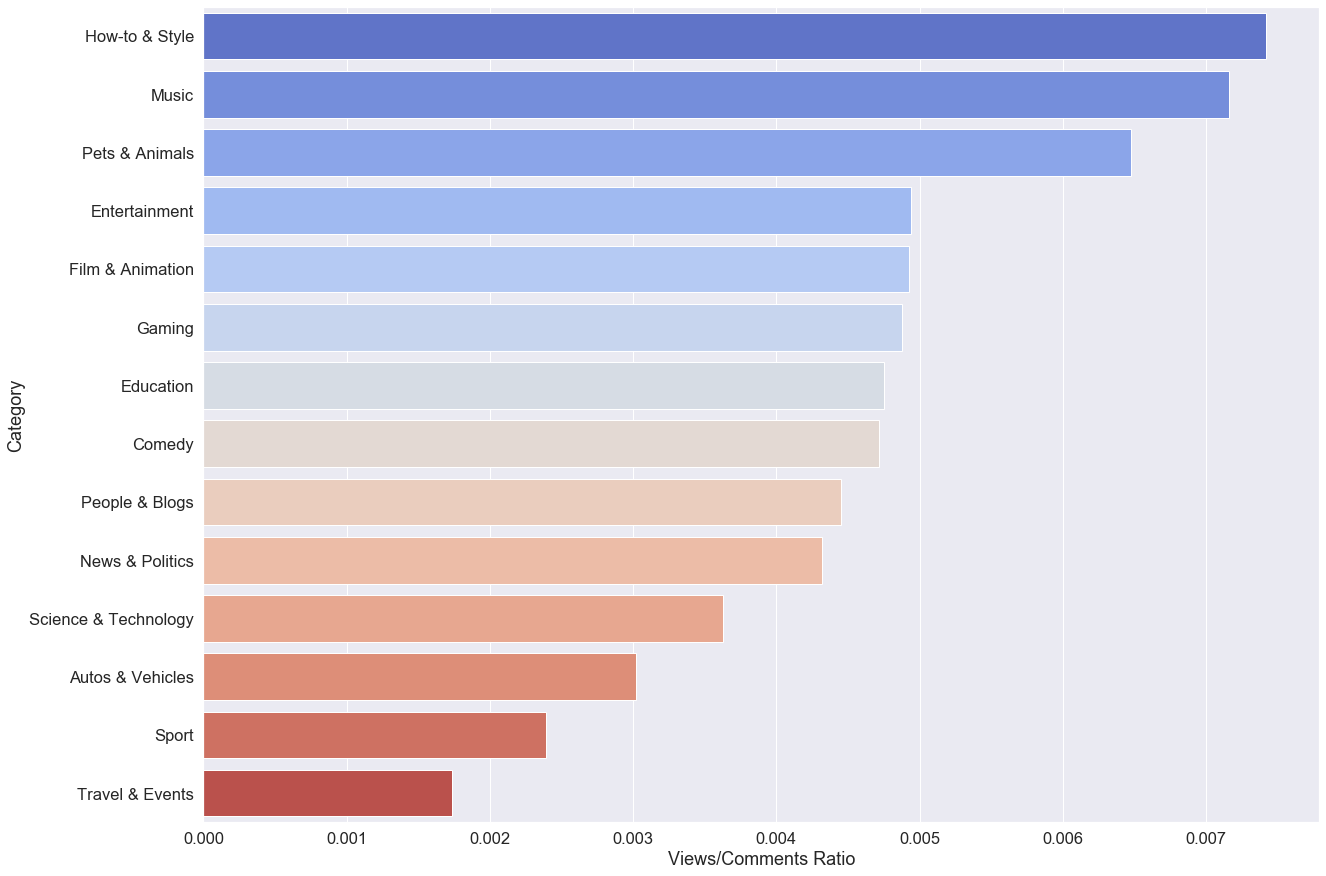

In [35]:
view_comment_ratio = videos_df.groupby('category_name')['comment_count'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_comment_ratio = view_comment_ratio.sort_values(ascending=False).reset_index()
view_comment_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_comment_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Comments Ratio', ylabel='Category')

### Likes/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Likes Ratio')]

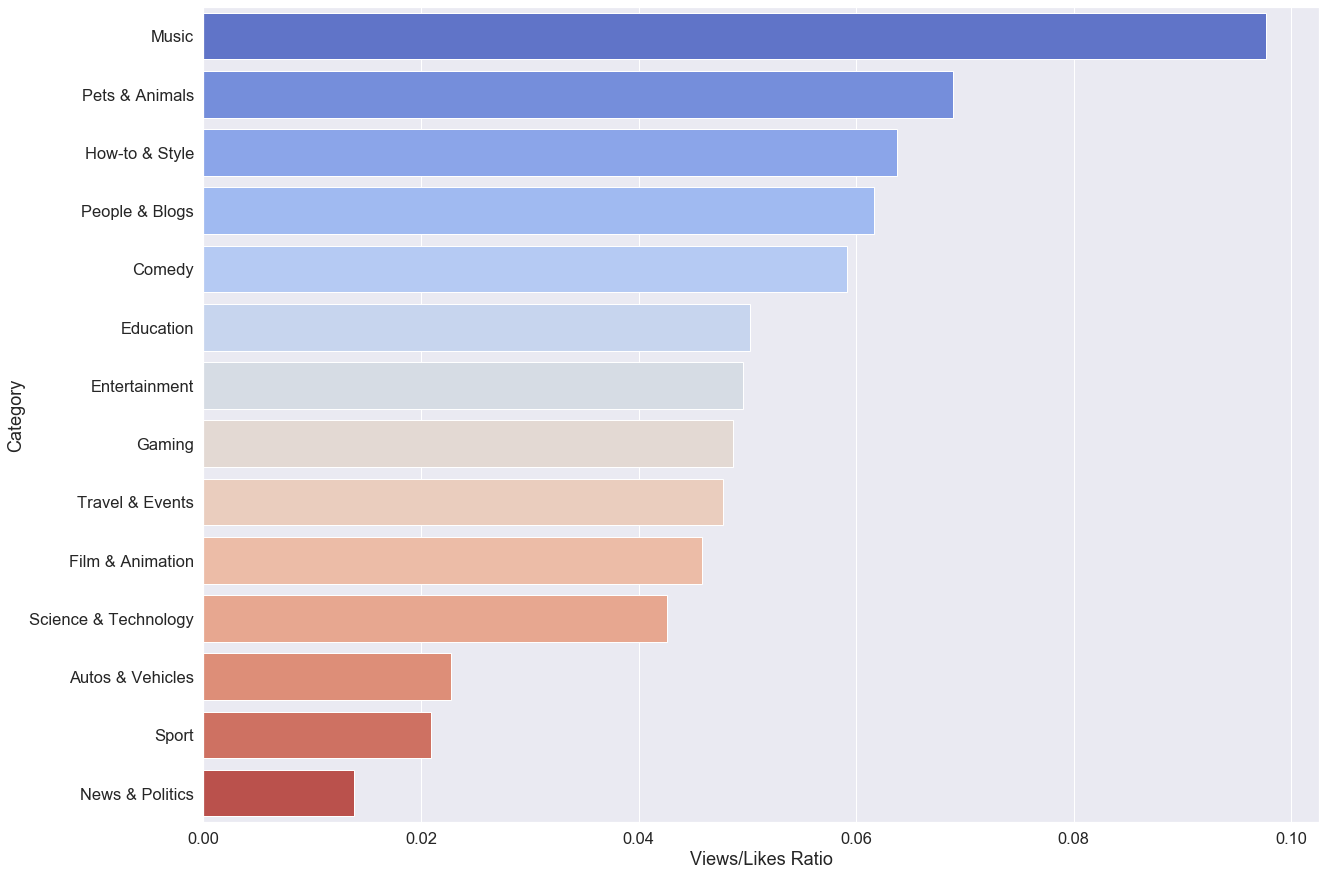

In [36]:
view_like_ratio = videos_df.groupby('category_name')['likes'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_like_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Likes Ratio', ylabel='Category')

### Dislikes/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Dislikes Ratio')]

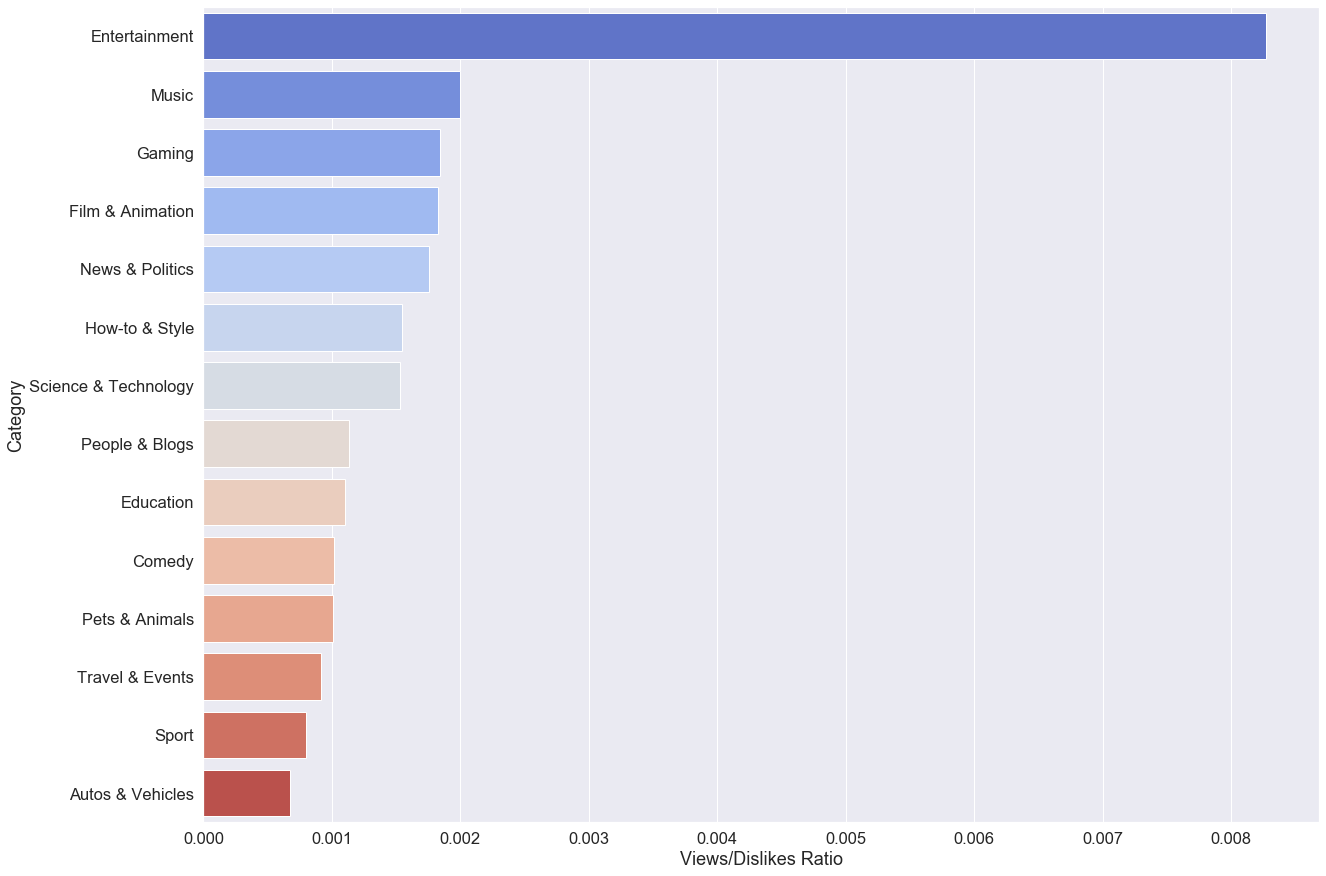

In [37]:
view_dislike_ratio = videos_df.groupby('category_name')['dislikes'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_dislike_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Dislikes Ratio', ylabel='Category')

### Top views videos wall

In [38]:
top_videos = videos_df.sort_values('view_count', ascending=False)
top_videos_thumbnail = top_videos['thumbnail_link'].head(100).reset_index()['thumbnail_link']
top_videos_thumbnail

0     https://i.ytimg.com/vi/2lAe1cqCOXo/default.jpg
1     https://i.ytimg.com/vi/RxAtuMu_ph4/default.jpg
2     https://i.ytimg.com/vi/pILCn6VO_RU/default.jpg
3     https://i.ytimg.com/vi/gIOyB9ZXn8s/default.jpg
4     https://i.ytimg.com/vi/LZyybvVx-js/default.jpg
                           ...                      
95    https://i.ytimg.com/vi/1ofaAod-WoQ/default.jpg
96    https://i.ytimg.com/vi/OAAJpK1oE30/default.jpg
97    https://i.ytimg.com/vi/WN8IxjWFvW4/default.jpg
98    https://i.ytimg.com/vi/f7TCzxOS6H4/default.jpg
99    https://i.ytimg.com/vi/e5dir37rPok/default.jpg
Name: thumbnail_link, Length: 100, dtype: object

In [39]:
rows = 10
columns = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(rows):
    rowHTML = ''
    for c in range(columns):
        tempHTML = '<img src="' + top_videos_thumbnail[c*10 + r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
    innerHTML += rowHTML
innerHTML += '</div>'
display(HTML(innerHTML))

### Heatmap of Category vs Trending Duration ratio

Text(151.421875, 0.5, 'Category')

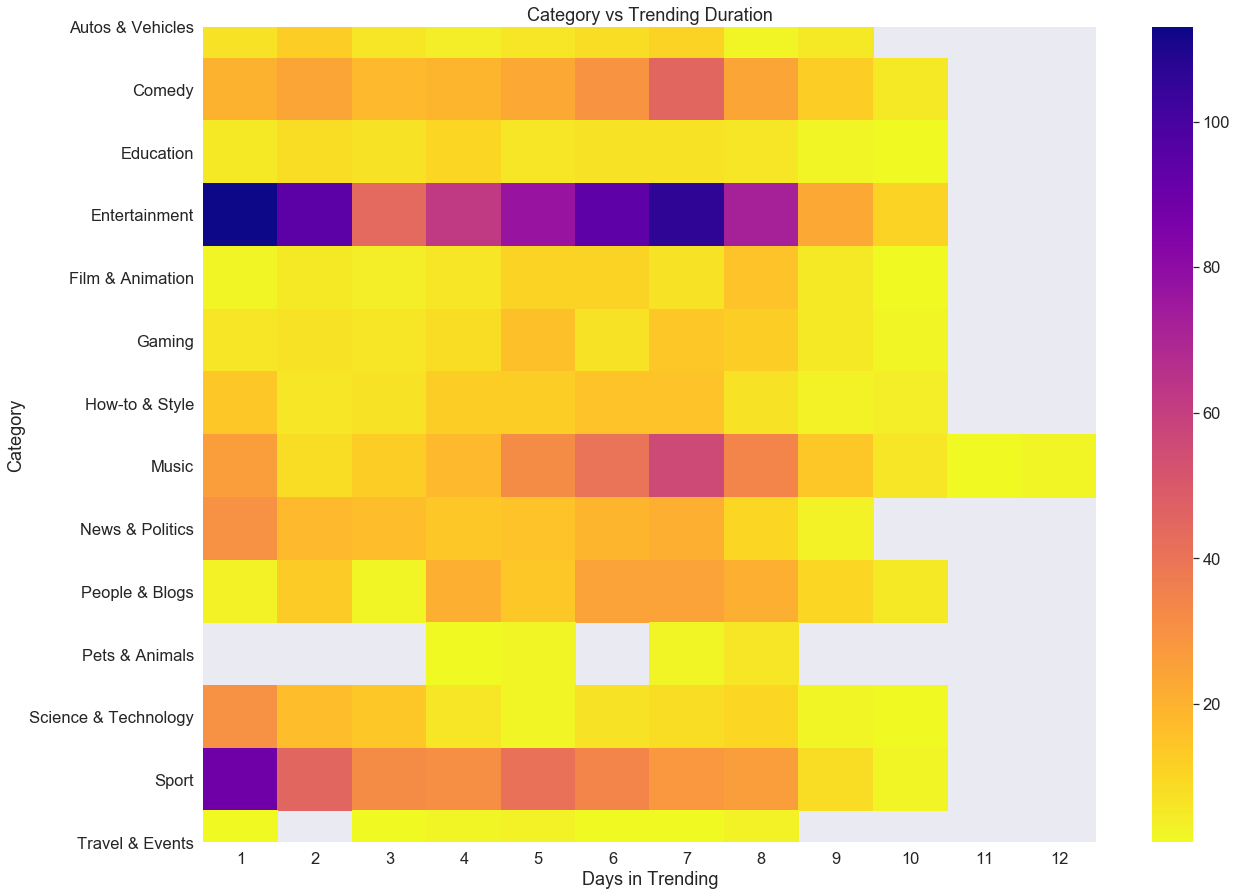

In [40]:
cat_trend_duration = videos_df.groupby(['category_name','days_in_trending']).count()['video_id'].unstack().clip(upper=300)

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category vs Trending Duration")
plt.xlabel('Days in Trending')
plt.ylabel('Category')

### The most popular time to upload video

[Text(0, 0.5, 'Number of videos published at the specific hour'),
 Text(0.5, 0, 'The hour when the video was published')]

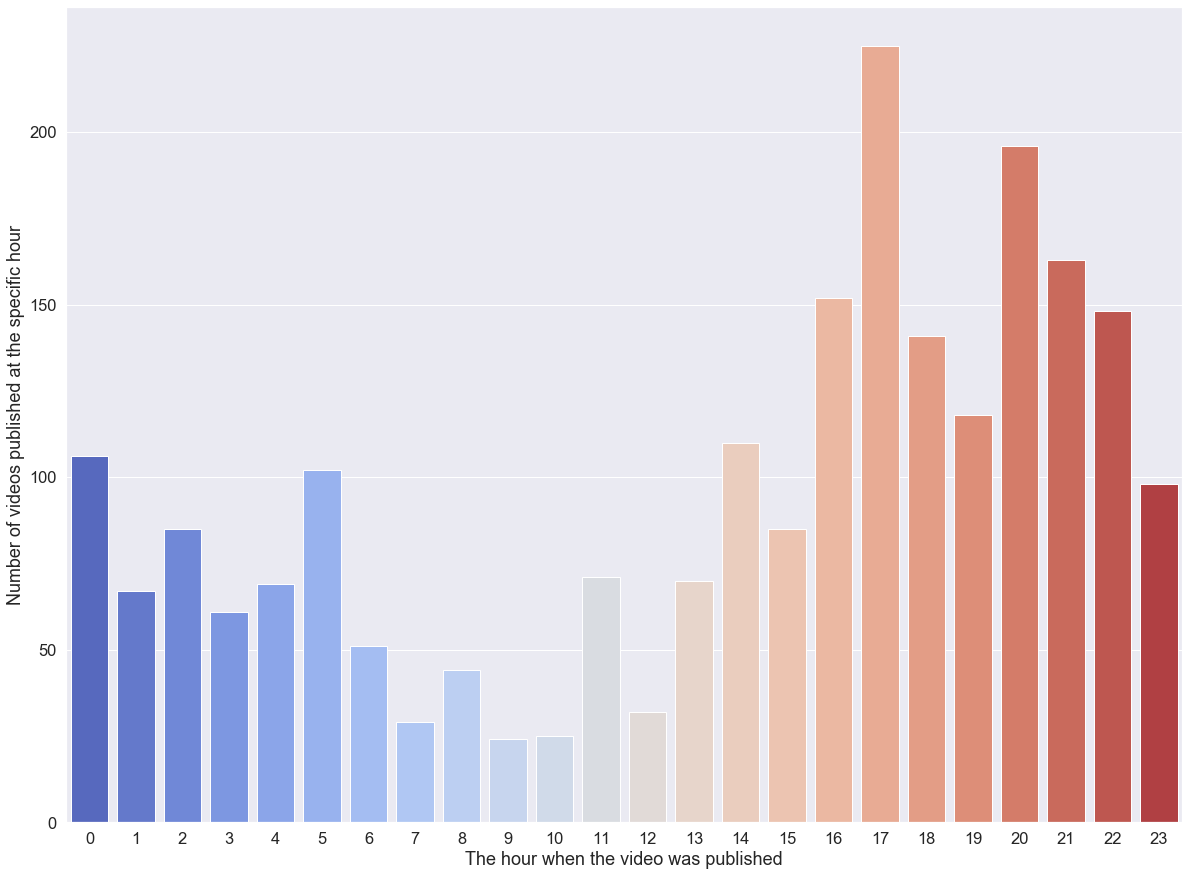

In [41]:
#most popular period of day to upload video

videos_df['publishing_hour'] = pd.to_datetime(videos_df['published_at']).dt.hour
videos_df.head()

num_videos_in_each_hour = videos_df.groupby('publishing_hour')[['video_id', 'publishing_hour']].count()

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=num_videos_in_each_hour.index, y=num_videos_in_each_hour['video_id'], palette='coolwarm', ax=ax)
ax.set(xlabel='The hour when the video was published', ylabel='Number of videos published at the specific hour')

### The most popular day of week for publishing video

In [42]:
#get name of day from published_at
def map_date_to_day_name(date):
    return date.strftime('%A')

videos_df['publishing_day'] = videos_df['published_at'].apply(lambda var: map_date_to_day_name(var))

[Text(0, 0.5, 'Number of videos published at the specific day in week'),
 Text(0.5, 0, 'The day in week when the video was published')]

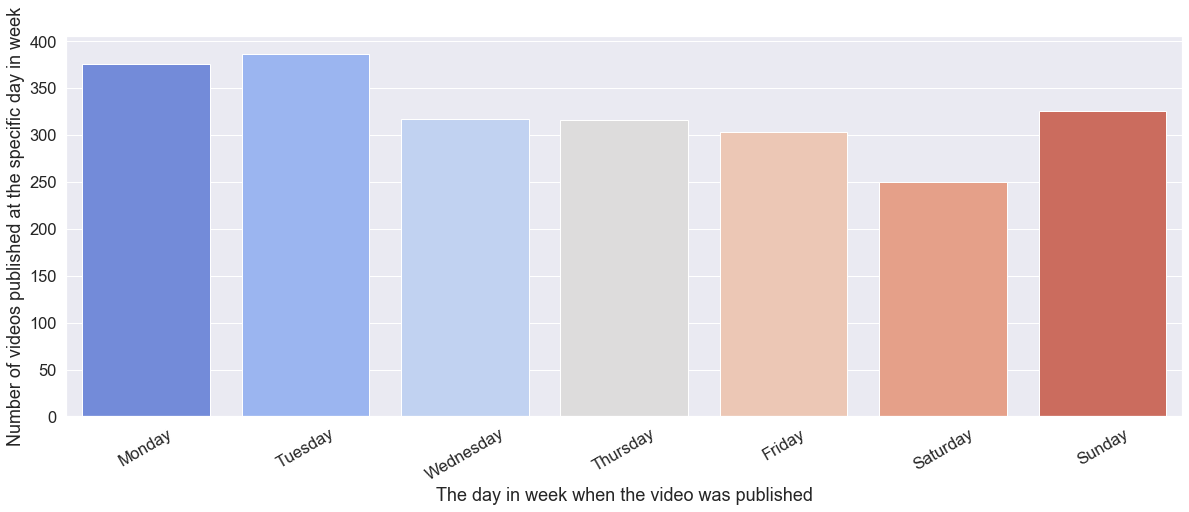

In [43]:
#most popular day to upload video

num_videos_in_each_day = videos_df.groupby('publishing_day')[['video_id', 'publishing_day']].count()
days_in_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x='publishing_day', data=videos_df, order=days_in_week, palette='coolwarm', ax=ax)
plt.xticks(rotation=30)
ax.set(xlabel='The day in week when the video was published', ylabel='Number of videos published at the specific day in week')

### Jointplots between likes, comments, views, days in trending, days to get in trending...

C:\Users\Marko\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'Corellation between likes and views')

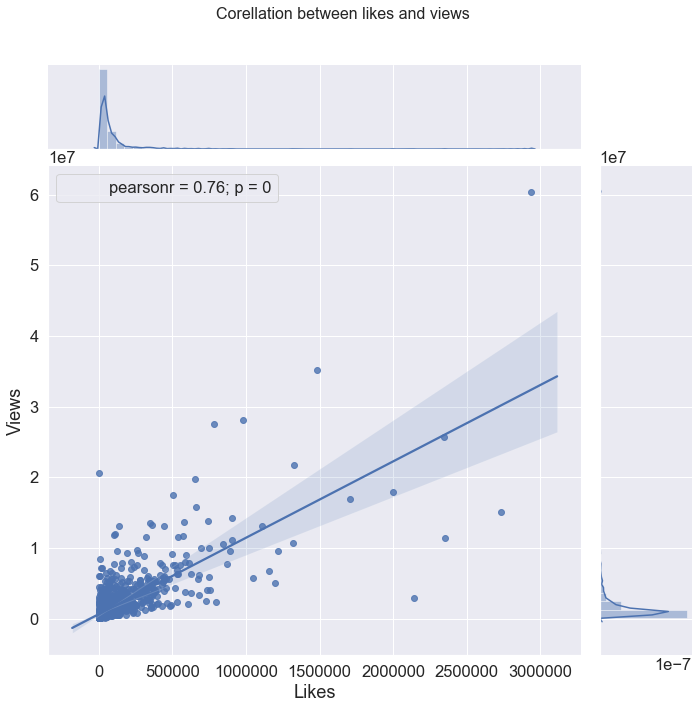

In [44]:
# Corellation between likes and views
likes_views = (sns.jointplot(data=videos_df, x='likes', y='view_count', kind='reg', height=10)
                .set_axis_labels("Likes", "Views"))
likes_views.annotate(stats.pearsonr)
likes_views.fig.subplots_adjust(top=0.9)
likes_views.fig.suptitle('Corellation between likes and views', fontsize=16)

Text(0.5, 0.98, 'Corellation between comments and views')

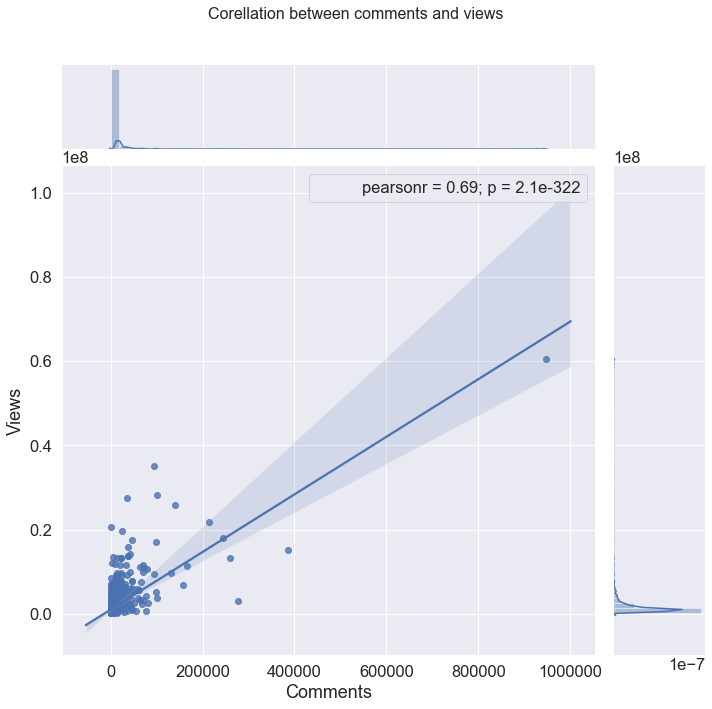

In [45]:
# Corellation between comments and views
comments_views = (sns.jointplot(data=videos_df, x='comment_count', y='view_count', kind='reg', height=10)
                .set_axis_labels("Comments", "Views"))
comments_views.annotate(stats.pearsonr)
comments_views.fig.subplots_adjust(top=0.9)
comments_views.fig.suptitle('Corellation between comments and views', fontsize=16)

Text(0.5, 0.98, 'Corellation between likes and comments')

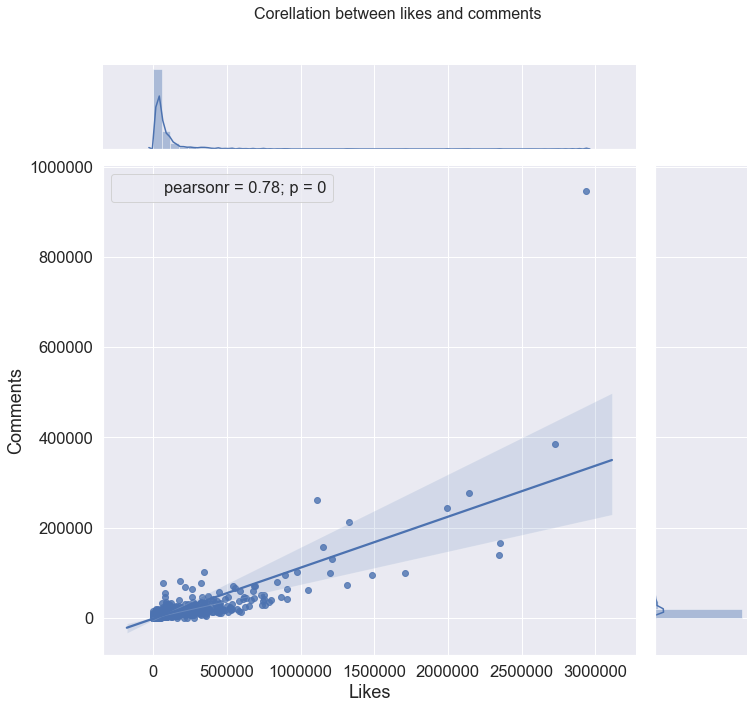

In [46]:
# Corellation between likes and comments
likes_comments = (sns.jointplot(data=videos_df, x='likes', y='comment_count', kind='reg', height=10)
                .set_axis_labels("Likes", "Comments"))
likes_comments.annotate(stats.pearsonr)
likes_comments.fig.subplots_adjust(top=0.9)
likes_comments.fig.suptitle('Corellation between likes and comments', fontsize=16)

Text(0.5, 0.98, 'Corellation between views and days in trending')

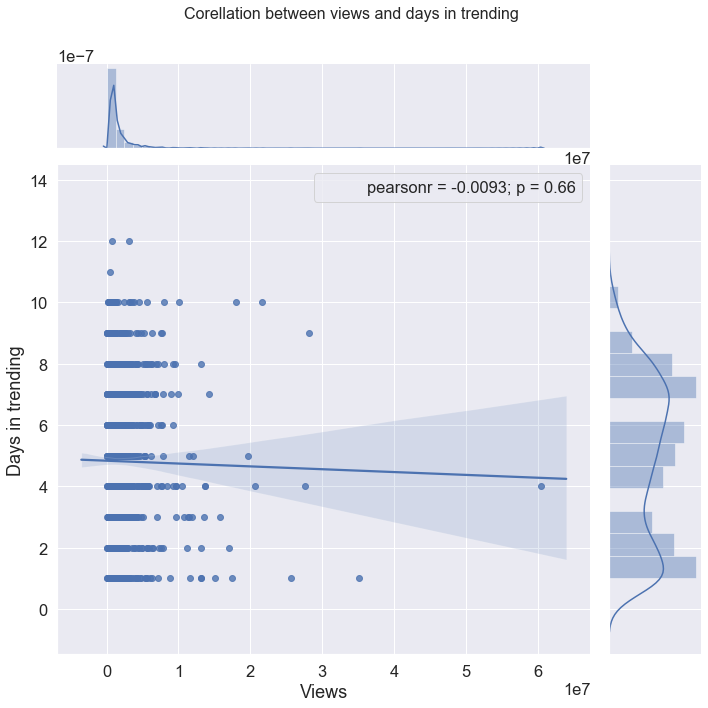

In [47]:
# Corellation between views and days in trending
views_trending = (sns.jointplot(data=videos_df, x='view_count', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Views", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between views and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN VIEWS AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between likes and days in trending')

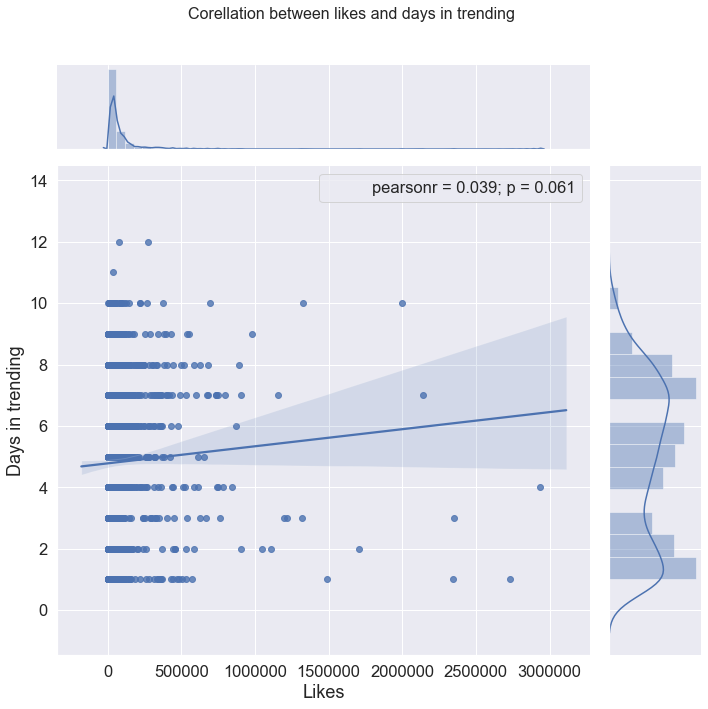

In [48]:
# Corellation between likes and days in trending
views_trending = (sns.jointplot(data=videos_df, x='likes', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Likes", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between likes and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN LIKES AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between comments and days in trending')

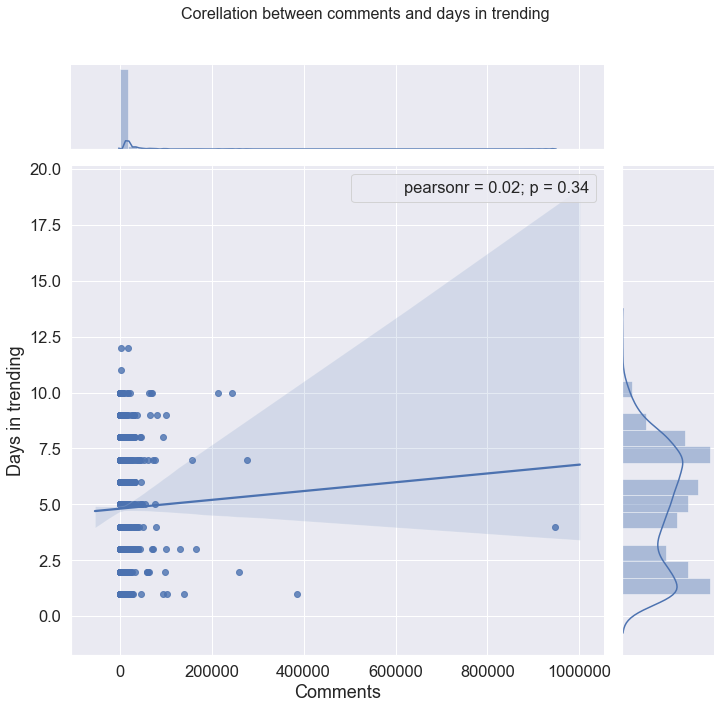

In [49]:
# Corellation between comments and days in trending
views_trending = (sns.jointplot(data=videos_df, x='comment_count', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Comments", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between comments and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN COMMENTS AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between days to trend and days in trending')

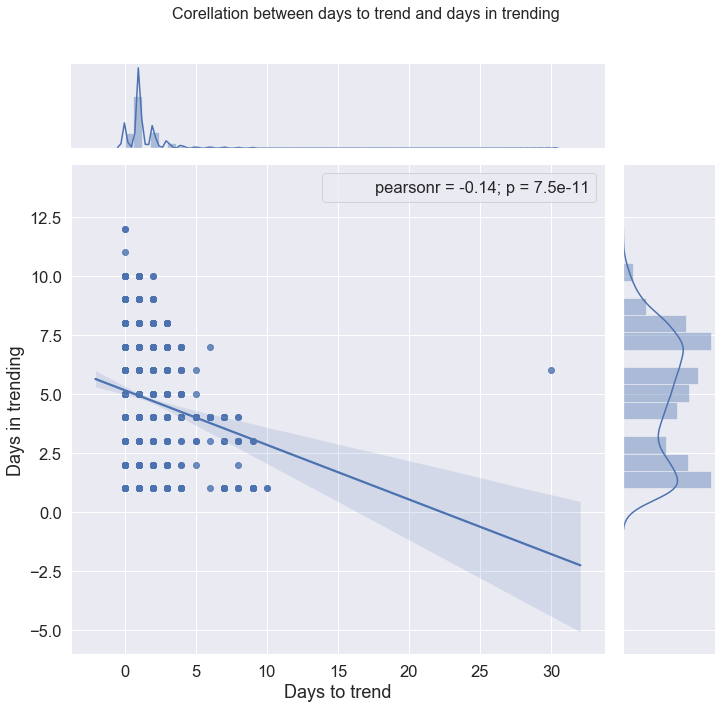

In [50]:
# Corellation between days to trend and days in trending
views_trending = (sns.jointplot(data=videos_df, x='publish_to_trend', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Days to trend", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between days to trend and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN DAYS TO TREND AND DAYS IN TRENDING!!!

In [51]:
videos_df.head()

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

         published_at                channel_id  \
0 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
1 2019-12-12 05:25:42  UCDSJCBYqL7VQrlXfhr1RtwA   
2 2019-12-11 23:00:53  UCQIUhhcmXsu6cN6n3y9-Pww   
3 2019-12-12 02:35:33  UCWJ2lWNubArHWmf3FIHbfcQ   
4 2019-12-12 02:38:37  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24    2019-12-12   
1                         Les Do Makeup           26    2019-12-12   
2                                Jesser           17    2019-12-12   
3                                   NBA           17    2019-12-12   
4                          Royal Family           24    2019-12-12   

                                                tags  view_count   likes  ...  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835  ...   
1                                             [none]      423215   52780  ...   
2  last to leave|nba basketball|nba basketball hi...      463685   20178  ...   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605  ...   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400  ...   

   comment_count                                  thumbnail_link  \
0          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

  comments_disabled  ratings_disabled  \
0             False             False   
1             False             False   
2             False             False   
3             False             False   
4             False             False   

                                         description days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                1   
1  Hi babygirls!  Thank you so much for watching ...                7   
2  Last to miss the basketball shot wins 10,000!●...                7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                6   

    category_name publish_to_trend  publishing_hour  publishing_day  
0   Entertainment                1                7       Wednesday  
1  How-to & Style                0                5        Thursday  
2           Sport                1               23       Wednesday  
3           Sport                0                2        Thursday  
4   Entertainment                0                2        Thursday  

[5 rows x 21 columns]

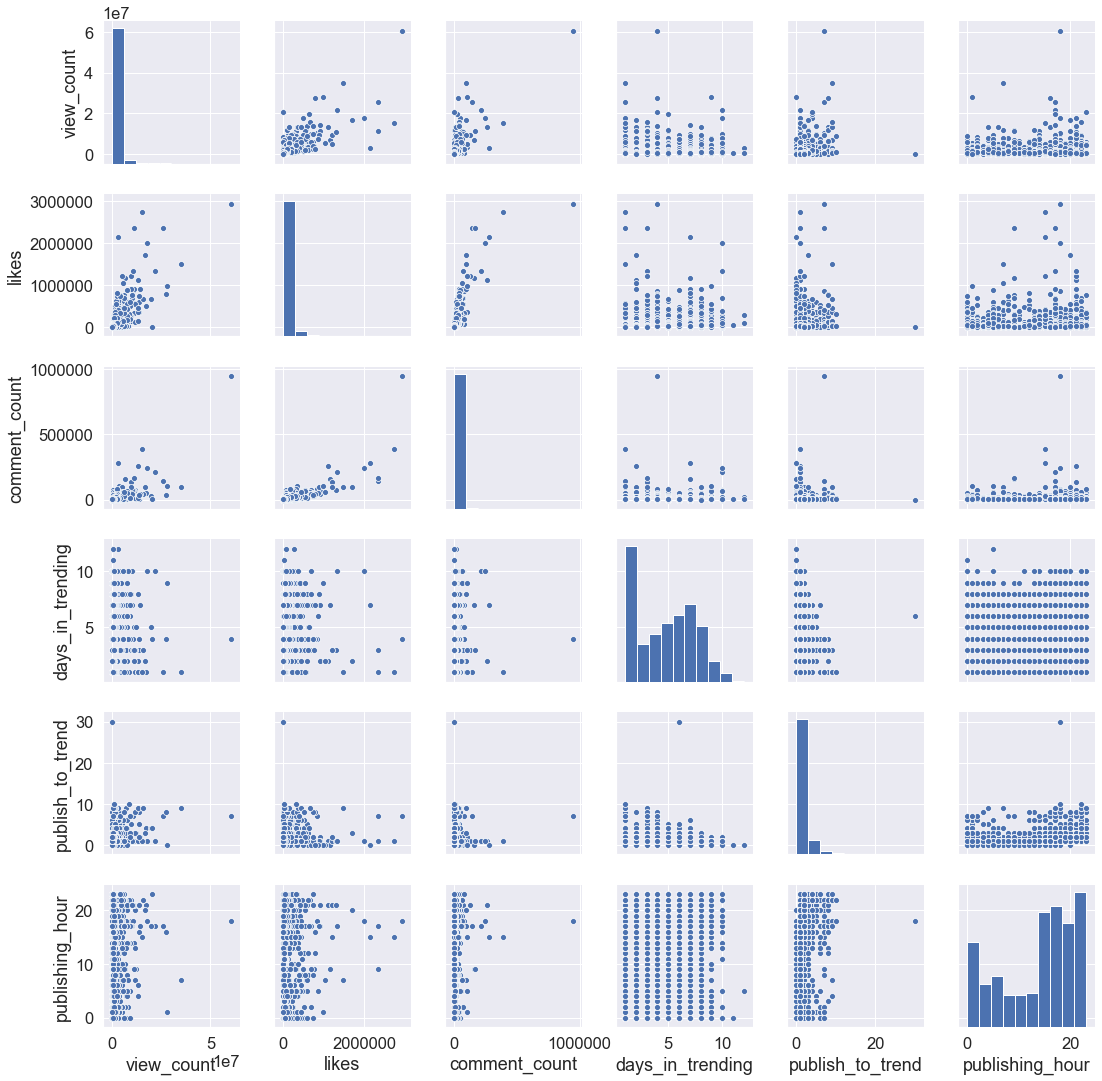

In [52]:
# treba dodati celobrojnu vrednost publishing_day-a
sns.pairplot(videos_df[['view_count', 'likes', 'comment_count', 'days_in_trending', 'publish_to_trend', 'publishing_hour']], palette='coolwarm')

# IT CAN BE SEEN THAT THERE IS A CORELLATION BETWEEN VIEW_COUNT, LIKES AND COMMENT_COUNT ()

# Inital model (regression)

### X and y arrays

In [53]:
X = videos_df[['view_count', 'dislikes', 'comment_count', 'category_id']]
y = videos_df['likes']
onehotencoder = OneHotEncoder(categorical_features = [3]) 
X = onehotencoder.fit_transform(X).toarray() 
X.size

C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


38624

### Split data into training and test sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### Feature Scaling

In [55]:
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

#scaler_y = MinMaxScaler()
#y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
#y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1))

### Linear regression

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [89]:
print(lin_reg.score(X_test, y_test))

0.8508312205057498


Text(0, 0.5, 'Predicted Y')

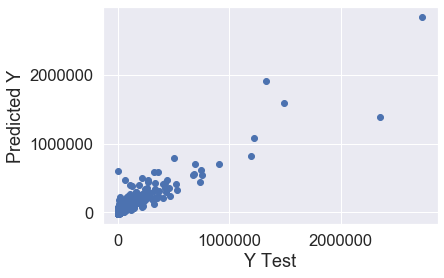

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', lin_reg.score(X_train, y_train))
print('R squared: ', lin_reg.score(X_test, y_test))

MAE: 35498.75513196481
MSE: 5750405222.388563
RMSE: 75831.42635074566
R squared on training set:  0.8511198046113193
R squared:  0.8508312205057498


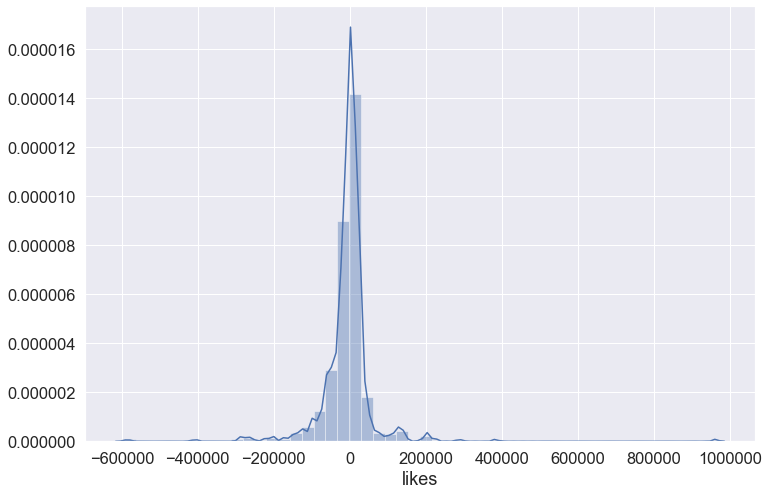

In [92]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

# Napomena: Rigde i GradientBoosting ce verovatno bolje raditi kad bude vise feature-a

### Ridge regression with Grid Search
#### the results are worse than in linear regression

In [136]:
ridge_reg = Ridge(solver='cholesky')
#ridge_reg.fit(X_train, y_train)
#y_pred = ridge_reg.predict(X_test)

In [137]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(estimator=ridge_reg, param_grid=parameters, cv=5)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_score_)
print(ridge_regressor.best_estimator_)

0.6675520710436311
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)


C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.96682e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.2024e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46091e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.19666e-17): result may not be accurate.
  overwrite_a=True).T


Text(0, 0.5, 'Predicted Y')

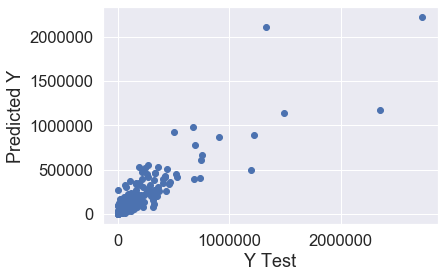

In [138]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', ridge_regressor.score(X_train, y_train))
print('R squared on test set: ', ridge_regressor.score(X_test, y_test))

MAE: 33523.612435436844
MSE: 7537916945.1271305
RMSE: 86821.17797592435
R squared on training set:  0.7077397829746359
R squared on test set:  0.6376797849155922


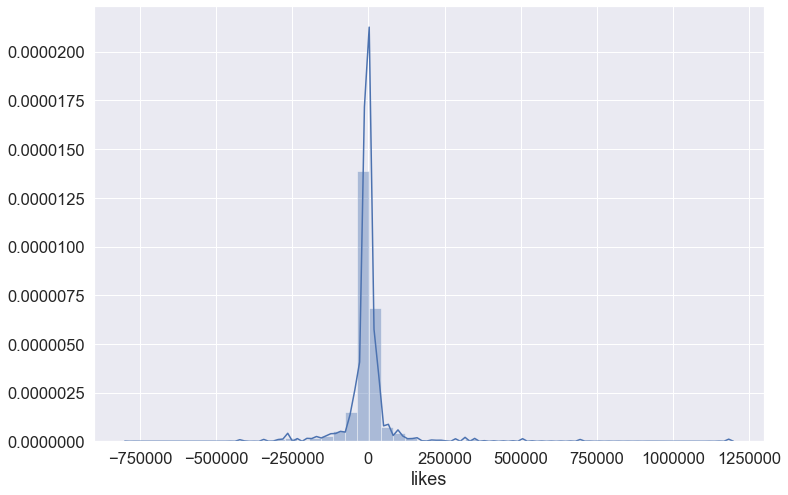

In [140]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

### Gradient Boosting regression with Grid Search

In [145]:
grad_boost_reg = GradientBoostingRegressor()

In [147]:
parameters = {#'learning_rate': [0.1, 0.2, 0.3],
              'subsample': [0.9, 0.5, 0.2],
              'n_estimators': [50, 100, 1000, 1000],
              #'max_depth': [4, 6, 8],
              'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2]}
grid = GridSearchCV(estimator=grad_boost_reg, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.7787989574125125
GradientBoostingRegressor(alpha=1e-15, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [148]:
y_pred = grid.predict(X_test)

Text(0, 0.5, 'Predicted Y')

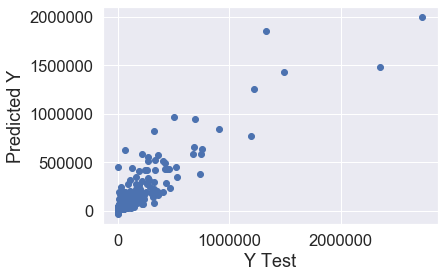

In [149]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [150]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', grid.score(X_train, y_train))
print('R squared on test set: ', grid.score(X_test, y_test))

MAE: 36399.69823986636
MSE: 7012422459.927554
RMSE: 83740.20814356479
R squared on training set:  0.9052210673903297
R squared on test set:  0.8180937761441851


### Support Vector Regression with Grid Search

In [163]:
svr = SVR()

In [164]:
parameters = {'kernel': ('linear', 'rbf','poly'), 
              'C': [1e0, 1e1, 1e2, 1e3],
              'gamma': np.logspace(-2, 2, 5),
              'epsilon':[0.1,0.2,0.5,0.3]}
svr_regressor = GridSearchCV(estimator=svr, param_grid=parameters, cv=5)
svr_regressor.fit(X_train, y_train)
print(svr_regressor.best_score_)
print(svr_regressor.best_estimator_)

0.7907470170332421
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma=100.0,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [165]:
y_pred = svr_regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

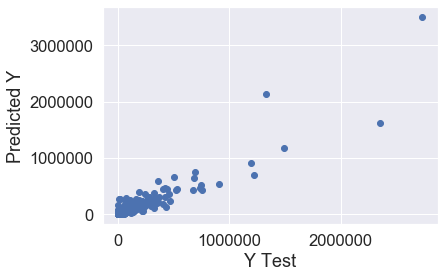

In [166]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [167]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', svr_regressor.score(X_train, y_train))
print('R squared on test set: ', svr_regressor.score(X_test, y_test))

MAE: 29113.238098520796
MSE: 5810807039.363032
RMSE: 76228.64972805849
R squared on training set:  0.8792488368218179
R squared on test set:  0.8492643630463422


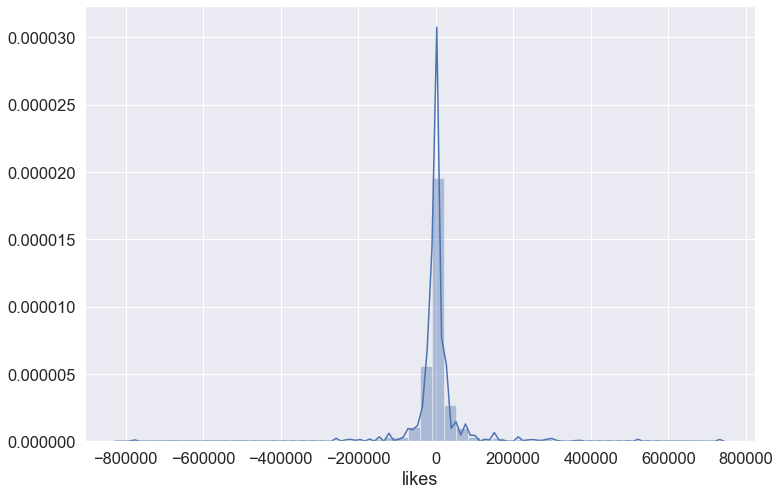

In [168]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

### Kernel Ridge Regression with Grid Search

In [174]:
kernel_ridge = KernelRidge()

In [176]:
parameters = {'kernel': ('linear', 'rbf','poly'), 
              'alpha': [1e0, 0.1, 1e-2, 1e-3],
              'gamma': np.logspace(-2, 2, 5)}
krr_regressor = GridSearchCV(estimator=kernel_ridge, param_grid=parameters, cv=5)
krr_regressor.fit(X_train, y_train)
print(krr_regressor.best_score_)
print(krr_regressor.best_estimator_)

0.8325905412211837
KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=1.0, kernel='poly',
            kernel_params=None)


In [178]:
y_pred = krr_regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

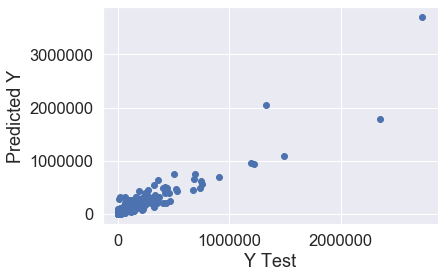

In [179]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [180]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', krr_regressor.score(X_train, y_train))
print('R squared on test set: ', krr_regressor.score(X_test, y_test))

MAE: 30618.719049322033
MSE: 5569706885.213021
RMSE: 74630.4688797613
R squared on training set:  0.9039254602604572
R squared on test set:  0.8555186380651545


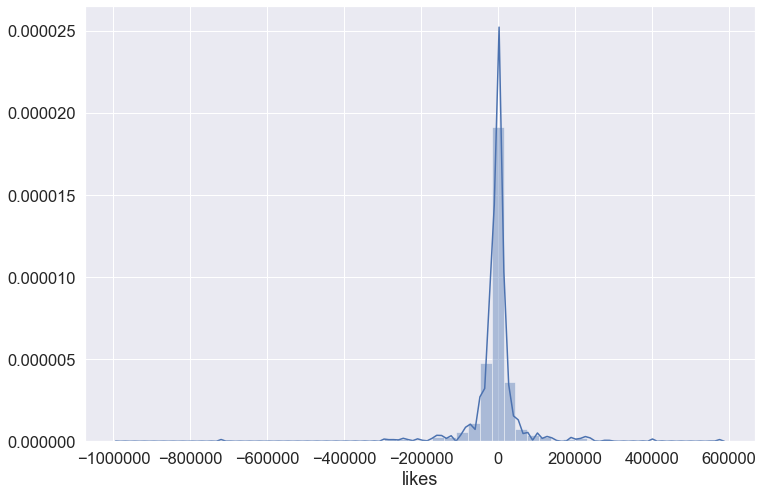

In [181]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

# Comments sentiment analysis

## Collecting comments for each video

In [126]:
#kljuc je id video,  vrednost predstavlja niz komentara za taj video
videos_comments=dict() #recnik gde ce kljuc biti video id a vrednost niz komentara
dfs_list=list(dfs.values())
# u obzir dolaze videi koji su usli i izasli iz trendinga za vreme skupljanja podataka

j=0
for df in reversed(dfs_list):    #iteriramo kroz foldere u kojima se nalaze fajlovi s komentarima za video                        
    comments_date=df.iloc[0].trending_date  
    comments_dir_path='../US_Datasets/'+comments_date+'_US' #ovde formiramo putanju do foledera gde se nalazi fajlovi sa komentarima 
                                                             #za svaki video
    j=j+1
    
    for file in os.listdir(comments_dir_path):  #iteriramo kroz sve fajlove unutar foldera
        video_comments=[]  #u ovaj niz punimo komentare on nekog videa
        comments=[]        #ovde cemo smestiti sve komentare nekog videa
        hasContent=True    #sluzi za proveru da li fajl ima sadrzaj.(fajlovi sa 1kb)
        
        #naziv fajla s komentarima je Comments_"video_Id".json
        videoId=file[9:]
        videoId=videoId[:-5]

        if videoId in videos and videoId not in videos_comments:    #provera da li imamo video i data frame i da li su njegovi komentari vec skupljeni
            
            with open(comments_dir_path+'/'+file, "r") as read_file:
                data = json.load(read_file)
                comments=data
                if len(comments) == 0:
                    hasContent=False
            
            if hasContent:

                for comment in comments: 
                    tempDate=''
                    tempDate=comment['snippet']['topLevelComment']['snippet']['publishedAt'].split('T')[0]
                    tempDate=tempDate.split('-')
                    commentDate=datetime(int(tempDate[0]), int(tempDate[1]), int(tempDate[2])).date()
                    videoTrendingDate=videos[comment['snippet']['videoId']].trending_date
                    videoTrendingDate=datetime.strptime(videoTrendingDate, '%y.%d.%m').date()

                    if commentDate<=videoTrendingDate:
                        video_comments.append(comment['snippet']['topLevelComment']['snippet']['textOriginal'])

                videos_comments[videoId]=video_comments
    


In [127]:
#za koliko videa smo pokupili komentare
len(videos_comments)

2151

In [128]:
#PROVERA KOLIKO IMA VIDEO KOJIMA SU KOMENTARI DISABLED
len(videos_df[videos_df['comments_disabled'] == True])

26

In [130]:
#PROVERA KOLIKO OD KOLIKO VIDEA NEMAMO KOMENTARA
i=0
for v in videos:
    
    if v not in videos_comments:
        i=i+1
        print(v)
print('Nije'+str(i))
print(len(videos))

-pM-GaLh5v0
hPZDZsHShwg
T1qjjr2V-7g
4i1SnSrOLek
iA9F3pfoVXY
b3vJRFYGCOw
BDjNG2LQRfM
bsoGh1czMGw
I9t6YW3o-xc
amdbtHvSeeA
BgTsKiZODZU
BCf5gsl3C08
mB31x23bB5g
TzMyhoKQ294
OHQJeCeQnFM
6CqGuFVPH4I
rdoXYZBWzXk
CABVnXoe9gw
SRuQzlVjOSM
6r8eahVpQgc
NkMTKGM-efw
WCnxaYOujIU
4OnwUz-I2GI
nHttheXCeTw
pgguJ-XYkXY
6rQy5wgfHa0
8849UFQu2RQ
9RJaf28koN8
CoDPTJ-3qCM
mMhCdIat_RY
f9YX36nHKYo
lIlMtVGI5Pg
sLuAYsPUKic
VKqC5w207O4
y-eIhBThlrY
RIuk23XHYj0
BLbPPhCVdUo
SUrK9cm8v_8
3ZhYjN0jBhc
VicXpIAOQQw
6iKtijQBSF8
CnTGWvHr2Wo
7vmMCwyEF8Q
lVJPrwvQees
9puQp_MhFpo
DzlHzYUVZ8U
1H-HOPiai5Y
3O75H4CzB1M
6qXalNqIHHc
DJwYJeOtpdc
uI3y18B0STc
gSNzcy71wyo
eJmLgBmVvH4
cE30kk8tUwQ
eMAgdmA4Iw4
rtkmcYMcsM4
CbONehyPq5k
MNF8lif0w0g
HOE-JssEr5A
POLYDXAN0AE
bj6yezAi_wk
jFuOoAFJlOg
kKI4E06HVpo
J1T3YBAzKgs
-2pffpPl1lQ
OTUIxtoHxNQ
fGDNzMLfSBY
VE7U_bLmAx8
yrKFf1EKUZI
2wAekP9Z1Zs
_RB1OEeyOyk
PghzLvHQJQg
zqUGuuDLF8A
ad3FoeKuzuQ
L7Odm2WAP1g
fX5B5Gx8RXA
75RI0EoV92c
VjWTsBY9l4w
d28vatk1iUc
1g6W8Bj4zIo
LbSpVeBjXhI
hG7FHaAE_1c
5DBOGOFw-OI
hmul